In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [348]:
df = pd.read_csv('the-boston-houseprice-data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [349]:
df.dtypes  # every column has numerical data

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [350]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [351]:
df.shape[0]

506

Dividing dataset into full _train and test dataset

In [352]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=11)

In [353]:
df_full_train.shape[0], df_test.shape[0]

(404, 102)

Further dividing full_train dataset into train and validation dataset

In [354]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [355]:
df_train.shape[0], df_val.shape[0]

(303, 101)

In [356]:
df_train = df_train.reset_index(drop=True)  # reseting the index
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,0.03502,80.0,4.95,0,0.411,6.861,27.9,5.1167,4,245.0,19.2,396.90,3.33,28.5
2,0.06127,40.0,6.41,1,0.447,6.826,27.6,4.8628,4,254.0,17.6,393.45,4.16,33.1
3,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666.0,20.2,380.79,10.19,20.8
4,0.03113,0.0,4.39,0,0.442,6.014,48.5,8.0136,3,352.0,18.8,385.64,10.53,17.5


Our target variable is `MEDV`. Thus splitting it out in y.

In [357]:
y_train = df_train.MEDV.values
y_val = df_val.MEDV.values
y_test = df_test.MEDV.values
y_full_train = df_full_train.MEDV.values

In [358]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,0.03502,80.0,4.95,0,0.411,6.861,27.9,5.1167,4,245.0,19.2,396.90,3.33,28.5
2,0.06127,40.0,6.41,1,0.447,6.826,27.6,4.8628,4,254.0,17.6,393.45,4.16,33.1
3,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666.0,20.2,380.79,10.19,20.8
4,0.03113,0.0,4.39,0,0.442,6.014,48.5,8.0136,3,352.0,18.8,385.64,10.53,17.5


In [359]:
corr = df_train.corrwith(df_train.MEDV)
corr  # no variable has 0 correlation with `MEDV`

CRIM      -0.403984
ZN         0.379360
INDUS     -0.472082
CHAS       0.196677
NOX       -0.472005
RM         0.709796
AGE       -0.429156
DIS        0.281575
RAD       -0.419042
TAX       -0.489718
PTRATIO   -0.496034
B          0.351135
LSTAT     -0.749620
MEDV       1.000000
dtype: float64

In [360]:
features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [361]:
X_train = df_train[features]
X_val = df_val[features]
X_test = df_test[features]

In [362]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [363]:
y_pred = model.predict(X_val)

<AxesSubplot:ylabel='Count'>

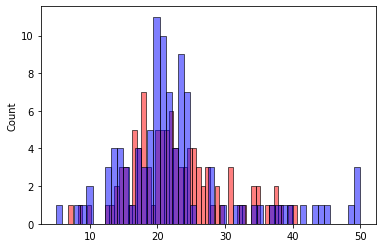

In [364]:
sns.histplot(y_pred, alpha=0.5, color='red', bins=50)
sns.histplot(y_val, alpha=0.5, color='blue', bins=50)

In [365]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r_mse = np.sqrt(mse)
    return r_mse

### Training model on full_train dataset

In [366]:
X_full_train = df_full_train[features]
model.fit(X_full_train, y_full_train)

LinearRegression()

In [367]:
y_pred = model.predict(X_test)

In [368]:
rmse(y_test,y_pred)

5.190839262539162

In [370]:
# Random prediction
y_pred[23], y_test[23]

(33.316546617459274, 31.6)